In [1]:
username = 'XXXXXX'
pwd = 'XXXXXX'

In [2]:
pip install webdriver_manager

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
from time import sleep
import re
import numpy as np

#設定新視窗模式
my_options = webdriver.ChromeOptions()
my_options.add_argument("--start-maximized")        
my_options.add_argument("--incognito")              
my_options.add_argument("--disable-popup-blocking") 
my_options.add_argument("--disable-notifications")  
my_options.add_argument("--lang=zh-TW") 

#開啟google chrome，並套入上方寫入的模式
driver = webdriver.Chrome(
    options = my_options
)

In [3]:
#以下是'則留言'三個字還存在時使用的版本
#進入FB
def visit():
    url = "http://www.facebook.com"
    driver.get(url)
    sleep(1)

def loggin():
    #輸入帳密
    account = driver.find_element(By.CSS_SELECTOR, "input.inputtext._55r1._6luy")
    account.send_keys(username)
    sleep(1)
    password = driver.find_element(By.CSS_SELECTOR, "input.inputtext._55r1._6luy._9npi")
    password.send_keys(pwd)
    sleep(1)
    #登入
    button = driver.find_element(By.CSS_SELECTOR, "button._42ft._4jy0._6lth._4jy6._4jy1.selected._51sy")
    button.click()
    sleep(3)

# 切換頁面
def search():
    spec_url = "https://www.facebook.com/thisgroupofpeople"
    driver.get(spec_url)

#建立一個scroll function展開貼文
def scroll(scrolltimes):
    for i in range(scrolltimes):
    # 每一次頁面滾動都是滑到網站最下方
        js = 'window.scrollTo(0, document.body.scrollHeight);'
        driver.execute_script(js)
        sleep(2)
    
#抓取所有scroll出來的貼文按讚數以及留言數
def like():
    soup = bs(driver.page_source, "lxml")

    #將每一則貼文的元素存入posts的list中
    posts = soup.select("div.x1yztbdb.x1n2onr6.xh8yej3.x1ja2u2z")

    #從posts中抓出like(span中有class=xt0b8zv x2bj2ny xrbpyxo xl423tq)
    like = soup.select("span.xt0b8zv.x2bj2ny.xrbpyxo.xl423tq")

    # 將like中span的文本抓出來
    like_texts = [span.get_text() for span in like]

    # 篩選出數字、小數點和 "萬" 的正則表達式，套入like_texts中，並存入thumbs中
    pattern = re.compile(r'[\d\.萬]+')
    global like_list
    like_list = [pattern.findall(str(text)) for text in like_texts]

    # 將列表中的內容合併成字串
    like_list = [''.join(text) for text in like_list]
    
     #將like_list轉成數字，並去掉","
    for i in range(len(like_list)):  
        # 將出現 '萬' 的數值乘10000
        if(like_list[i].find('萬') != -1):
            like_list[i] = int(float(like_list[i][:like_list[i].find('萬')])*10000)
        else:
            like_list[i] = int(like_list[i].replace(',',''))
    print("按讚數:", like_list)
    sleep(1)

# 抓取留言數
    soup = bs(driver.page_source, "lxml")
    #從posts中抓出read
    read = soup.select("span.x193iq5w.xeuugli.x13faqbe.x1vvkbs.x1xmvt09.x1lliihq.x1s928wv.xhkezso.x1gmr53x.x1cpjm7i.x1fgarty.x1943h6x.xudqn12.x3x7a5m.x6prxxf.xvq8zen.xo1l8bm.xi81zsa")

    # 將read中span的文本抓出來
    read_data = [span.get_text() for span in read]
    # 使用正規表達式進行過濾，刪除含有大小寫英文元素
    pattern = re.compile(r'[a-zA-Z\\]+|喜劇演員')
    read_texts = [item for item in read_data if not re.search(pattern, item)]

    #建立一個read_list
    global read_list
    read_list=[]

    #在read_list中抓到我們需要的留言數的所有元素去掉"則留言"的文字
    for i in range(1,len(read_texts),2):
        #去掉"則留言"的文字
        if "則留言" in read_texts[i]:
            read_list.append(read_texts[i][0:-3])        
        else:
            read_list.append(read_texts[i])

    #將read_list轉成數字，並去掉","
    for i in range(len(read_list)):
        read_list[i] = int(read_list[i].replace(',',''))

    print("留言數:", read_list)
    sleep(1)
    
#抓取分享數

    #建立一個share_list
    global share_list
    share_list=[]

    #在share_list中抓到我們需要的分享數的所有元素去掉"次分享"的文字
    for i in range(2,len(read_texts),2):
        #去掉"次分享"的文字
        if "次分享" in read_texts[i]:
            share_list.append(read_texts[i][0:-3])        
        else:
            share_list.append(read_texts[i])

    #將share_list轉成數字，並去掉","
    for i in range(len(share_list)):
        share_list[i] = int(share_list[i].replace(',',''))

    print("分享次數:", share_list)
    print("貼文數:", len(like_list))

In [4]:
if __name__ == "__main__":
    visit()
    loggin()
    search()
    scroll(20)
    like()

按讚數: [1691, 17000, 100000, 2019, 1926, 4605, 1273, 45000, 3419, 837, 3508, 2175, 487, 3209, 10000, 3189, 732, 2428, 883, 1575, 2770, 428, 3388, 736, 14000, 1107, 3060, 3582, 692, 947, 3528, 809, 4533, 2918, 2860, 2954, 207, 3063, 10000, 11000, 1854, 967, 1578, 1776, 894, 7918, 1949, 1335, 5029, 11000, 12000, 2129, 9642, 9615, 3809, 1968, 540, 6862, 4477, 14000, 1414, 6815, 5643, 3732, 4712, 6052, 687, 880, 10000, 3664, 9842, 2079, 23000, 494, 2225, 409, 1883, 14000]
留言數: [40, 805, 1381, 58, 39, 54, 33, 1275, 78, 18, 85, 23, 11, 32, 159, 74, 14, 46, 14, 24, 92, 14, 115, 11, 896, 68, 66, 27, 37, 42, 114, 13, 308, 51, 193, 126, 7, 112, 339, 451, 12, 16, 33, 64, 48, 341, 34, 31, 102, 667, 667, 22, 1412, 1131, 90, 54, 8, 129, 37, 672, 38, 177, 69, 53, 68, 94, 13, 40, 497, 65, 230, 28, 304, 16, 63, 19, 44, 416, 7]
分享次數: [12, 1232, 539, 71, 44, 104, 60, 3932, 196, 10, 198, 60, 1, 7, 189, 19, 3, 107, 19, 44, 107, 26, 218, 42, 518, 39, 117, 48, 43, 65, 190, 14, 132, 41, 81, 164, 20, 105, 253, 7

In [8]:
pip install requests pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


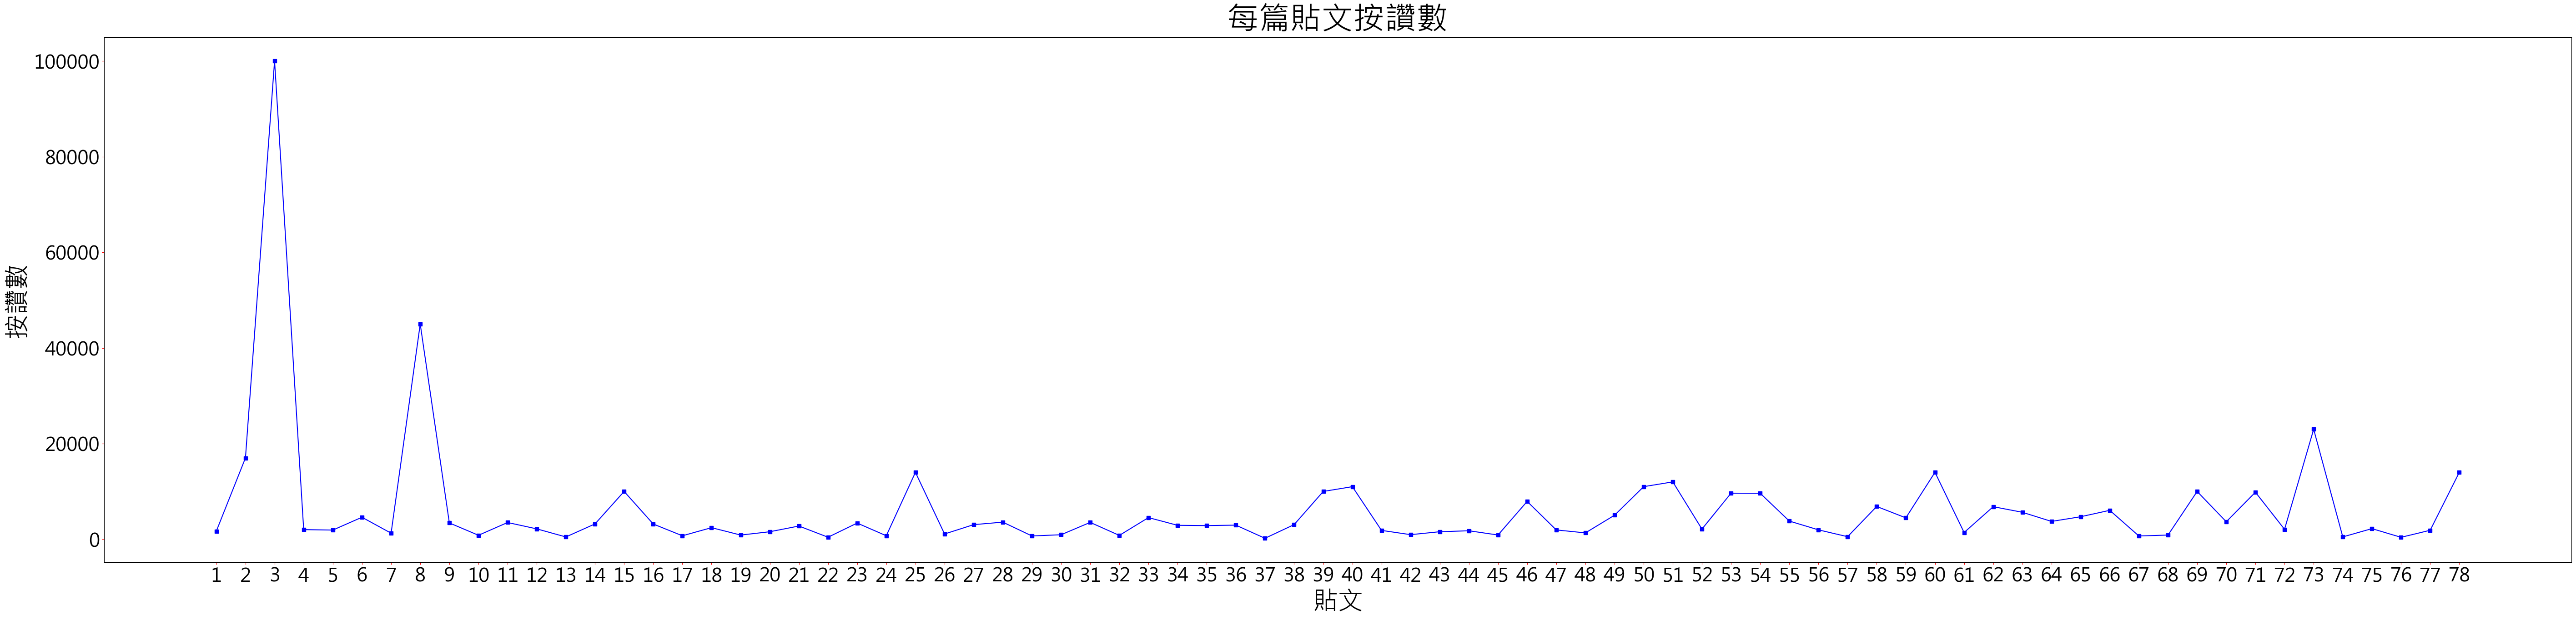

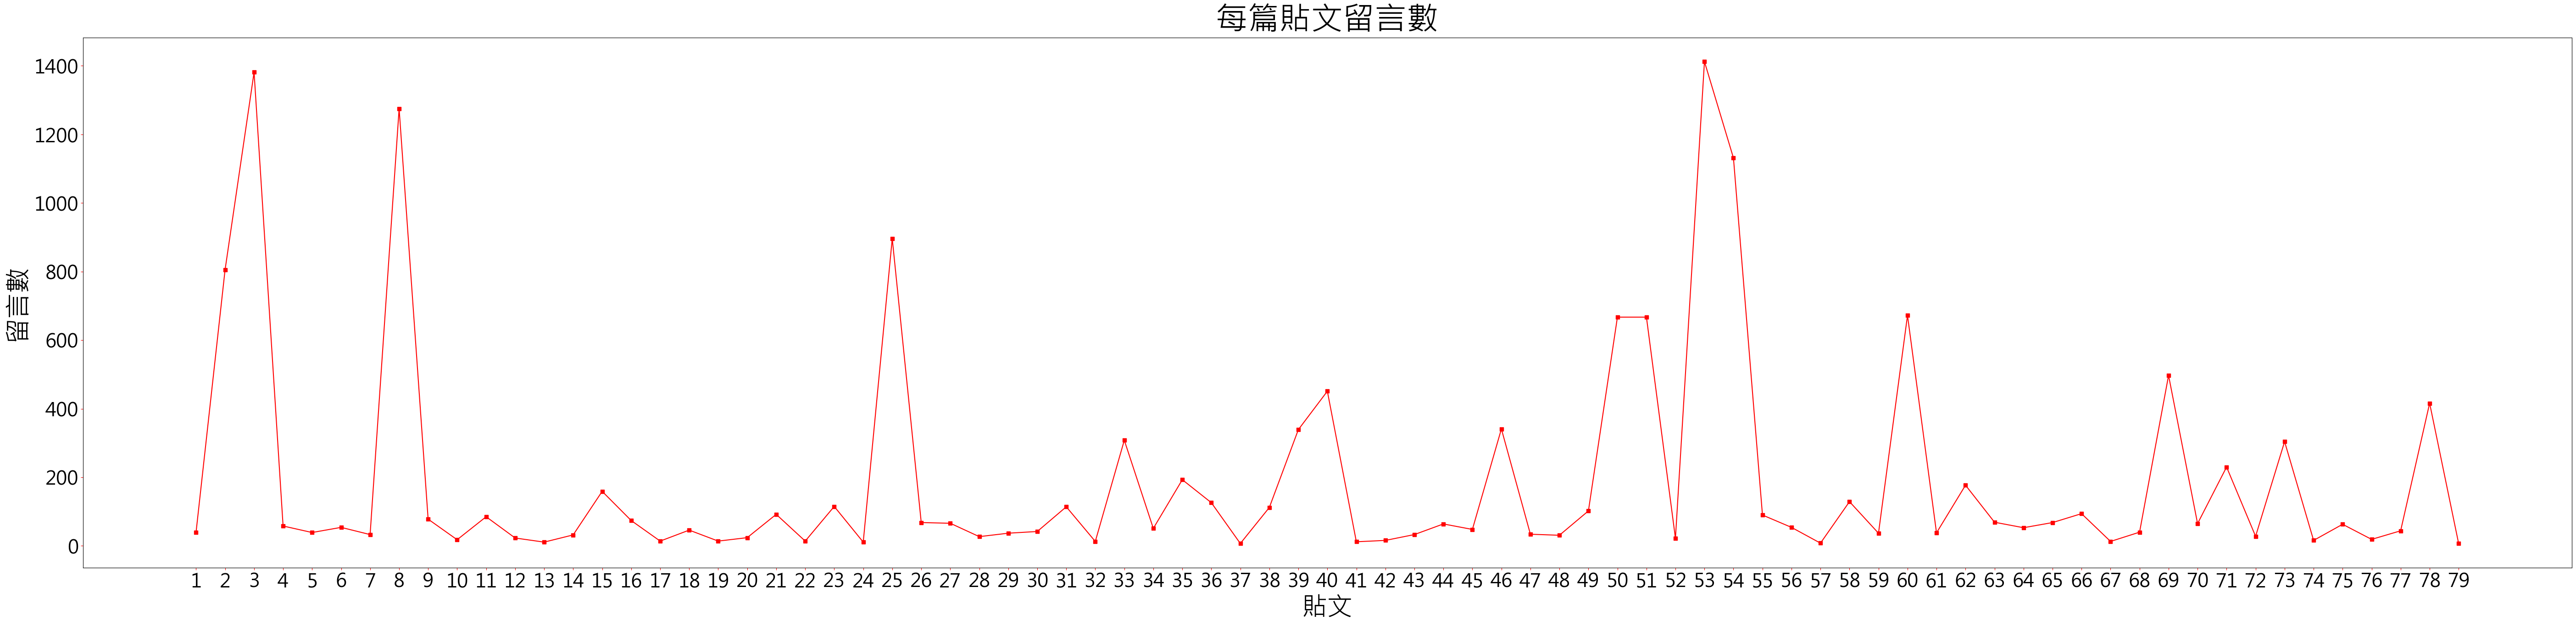

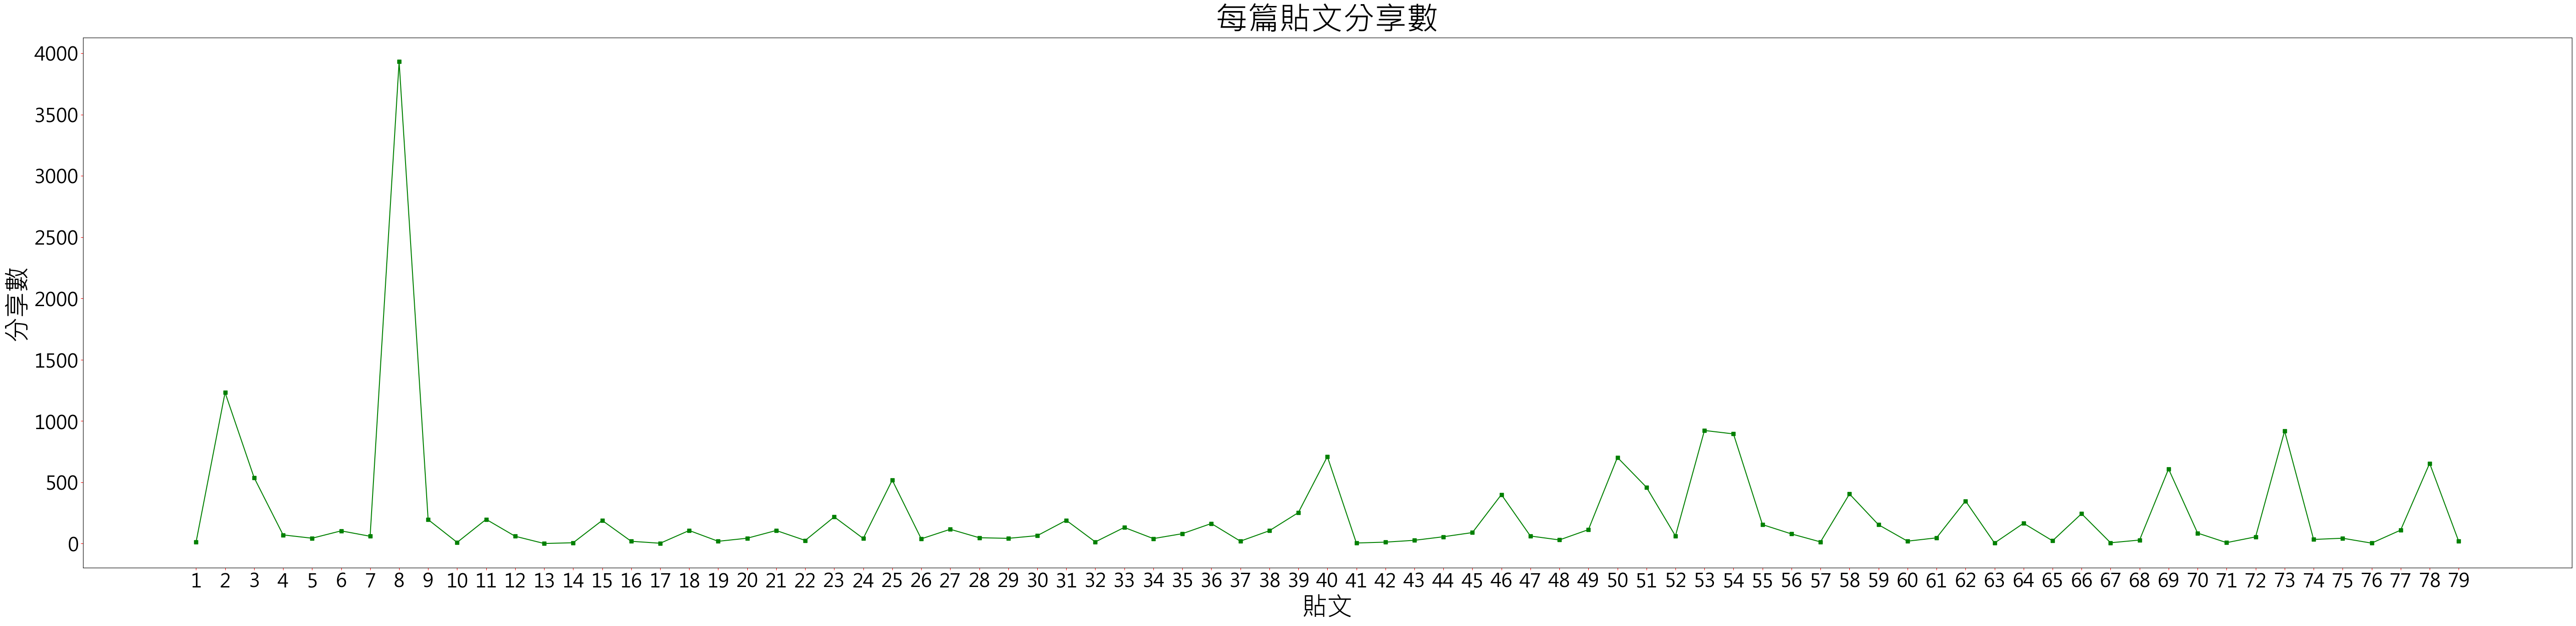

In [5]:
#用抓到的按讚數及留言數做折線圖
#匯入做圖套件
import matplotlib.pyplot as plt
#匯入中文(微軟正黑體)
from matplotlib.font_manager import fontManager
import matplotlib
matplotlib.rc('font', family = 'Microsoft JhengHei')

#x刻度顯示範圍為抓取貼文的數量
x_like = [x for x in range(1,len(like_list)+1)]

#繪製圖(一)按讚數折線圖
#設定圖表長寬
plt.figure(figsize=(70, 15))
plt.plot(x_like, like_list, 'b-s')
#設定圖表樣式
plt.title('每篇貼文按讚數',fontsize = 50)
plt.xlabel('貼文',fontsize = 40)
plt.ylabel('按讚數',fontsize = 40)
plt.tick_params(axis='both', labelsize=30, color='r')
plt.xticks(x_like)

#繪製圖(二)留言數折線圖
x_read = [x for x in range(1,len(read_list)+1)]
plt.figure(figsize=(70, 15))
plt.plot(x_read, read_list, 'r-s')
plt.title('每篇貼文留言數',fontsize = 50)
plt.xlabel('貼文',fontsize = 40)
plt.ylabel('留言數',fontsize = 40)
plt.tick_params(axis='both', labelsize=30, color='r')
plt.xticks(x_read)

#繪製圖(三)分享數折線圖
x_share = [x for x in range(1,len(share_list)+1)]
plt.figure(figsize=(70, 15))
plt.plot(x_share, share_list, 'g-s')
plt.title('每篇貼文分享數',fontsize = 50)
plt.xlabel('貼文',fontsize = 40)
plt.ylabel('分享數',fontsize = 40)
plt.tick_params(axis='both', labelsize=30, color='r')
plt.xticks(x_share)

plt.show()

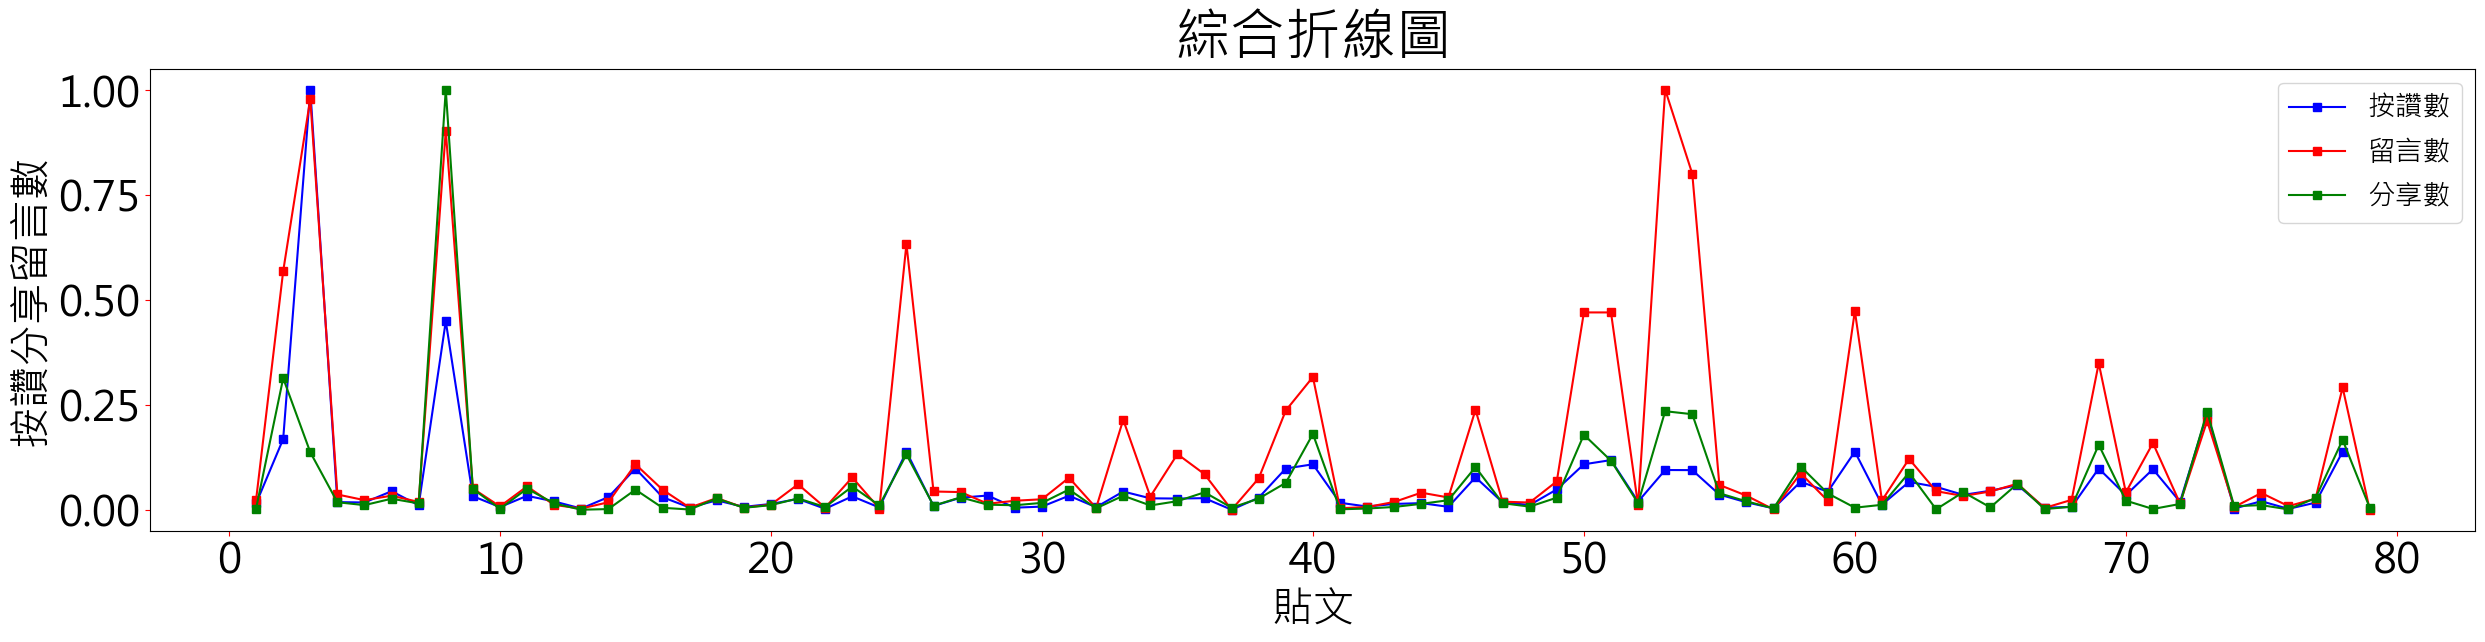

In [6]:
#合併兩張圖做分析，使用歸一化，以類似百分比呈現
plt.figure(figsize=(30, 6))

#設定歸一數值
min_val = np.min(like_list)
max_val = np.max(like_list)
norm_like_list = (like_list - min_val) / (max_val - min_val)

min_val = np.min(read_list)
max_val = np.max(read_list)
norm_read_list = (read_list - min_val) / (max_val - min_val)

min_val = np.min(share_list)
max_val = np.max(share_list)
norm_share_list = (share_list - min_val) / (max_val - min_val)

plt.plot(x_like, norm_like_list,'b-s' , label='按讚數')
plt.plot(x_read, norm_read_list, 'r-s', label='留言數')
plt.plot(x_share, norm_share_list, 'g-s', label='分享數')
plt.title('綜合折線圖',fontsize = 40)
plt.xlabel('貼文',fontsize = 30)
plt.ylabel('按讚分享留言數',fontsize = 30)
plt.tick_params(axis='both', labelsize=30, color='r')
plt.legend(prop={'size':20})
plt.show()